In [5]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [40]:
qc = QuantumCircuit(14, 8)

# Prepare board state
qc.x(0)
qc.x(4)
qc.x(5)
qc.x(7)

qc.h(13)
qc.barrier()

# Get rule set
qc.ccx(0, 1, 9)
qc.ccx(2, 3, 10)
qc.ccx(4, 5, 11)
qc.ccx(6, 7, 12)

qc.barrier()

# First rule set
qc.ccx(9, 13, 8)
qc.cswap(8, 0, 4)
qc.cswap(8, 1, 5)
qc.ccx(9, 13, 8)

qc.x(13)

qc.ccx(9, 13, 8)
qc.cswap(8, 0, 2)
qc.cswap(8, 1, 3)
qc.ccx(9, 13, 8)

qc.x(13)

qc.barrier()

# Second rule set
qc.ccx(10, 13, 8)
qc.cswap(8, 2, 6)
qc.cswap(8, 3, 7)
qc.ccx(10, 13, 8)

qc.x(13)

qc.ccx(10, 13, 8)
qc.cswap(8, 2, 0)
qc.cswap(8, 3, 1)
qc.ccx(10, 13, 8)

qc.x(13)

qc.barrier()

# Third rule set
qc.ccx(11, 13, 8)
qc.cswap(8, 4, 6)
qc.cswap(8, 5, 7)
qc.ccx(11, 13, 8)

qc.x(13)

qc.ccx(11, 13, 8)
qc.cswap(8, 4, 0)
qc.cswap(8, 5, 1)
qc.ccx(11, 13, 8)

qc.x(13)

qc.barrier()

# Fourth rule set
qc.ccx(12, 13, 8)
qc.cswap(8, 6, 4)
qc.cswap(8, 7, 5)
qc.ccx(12, 13, 8)

qc.x(13)

qc.ccx(12, 13, 8)
qc.cswap(8, 6, 2)
qc.cswap(8, 7, 3)
qc.ccx(12, 13, 8)

qc.x(13)

qc.barrier()

# Measure
qc.measure(range(8), range(8))

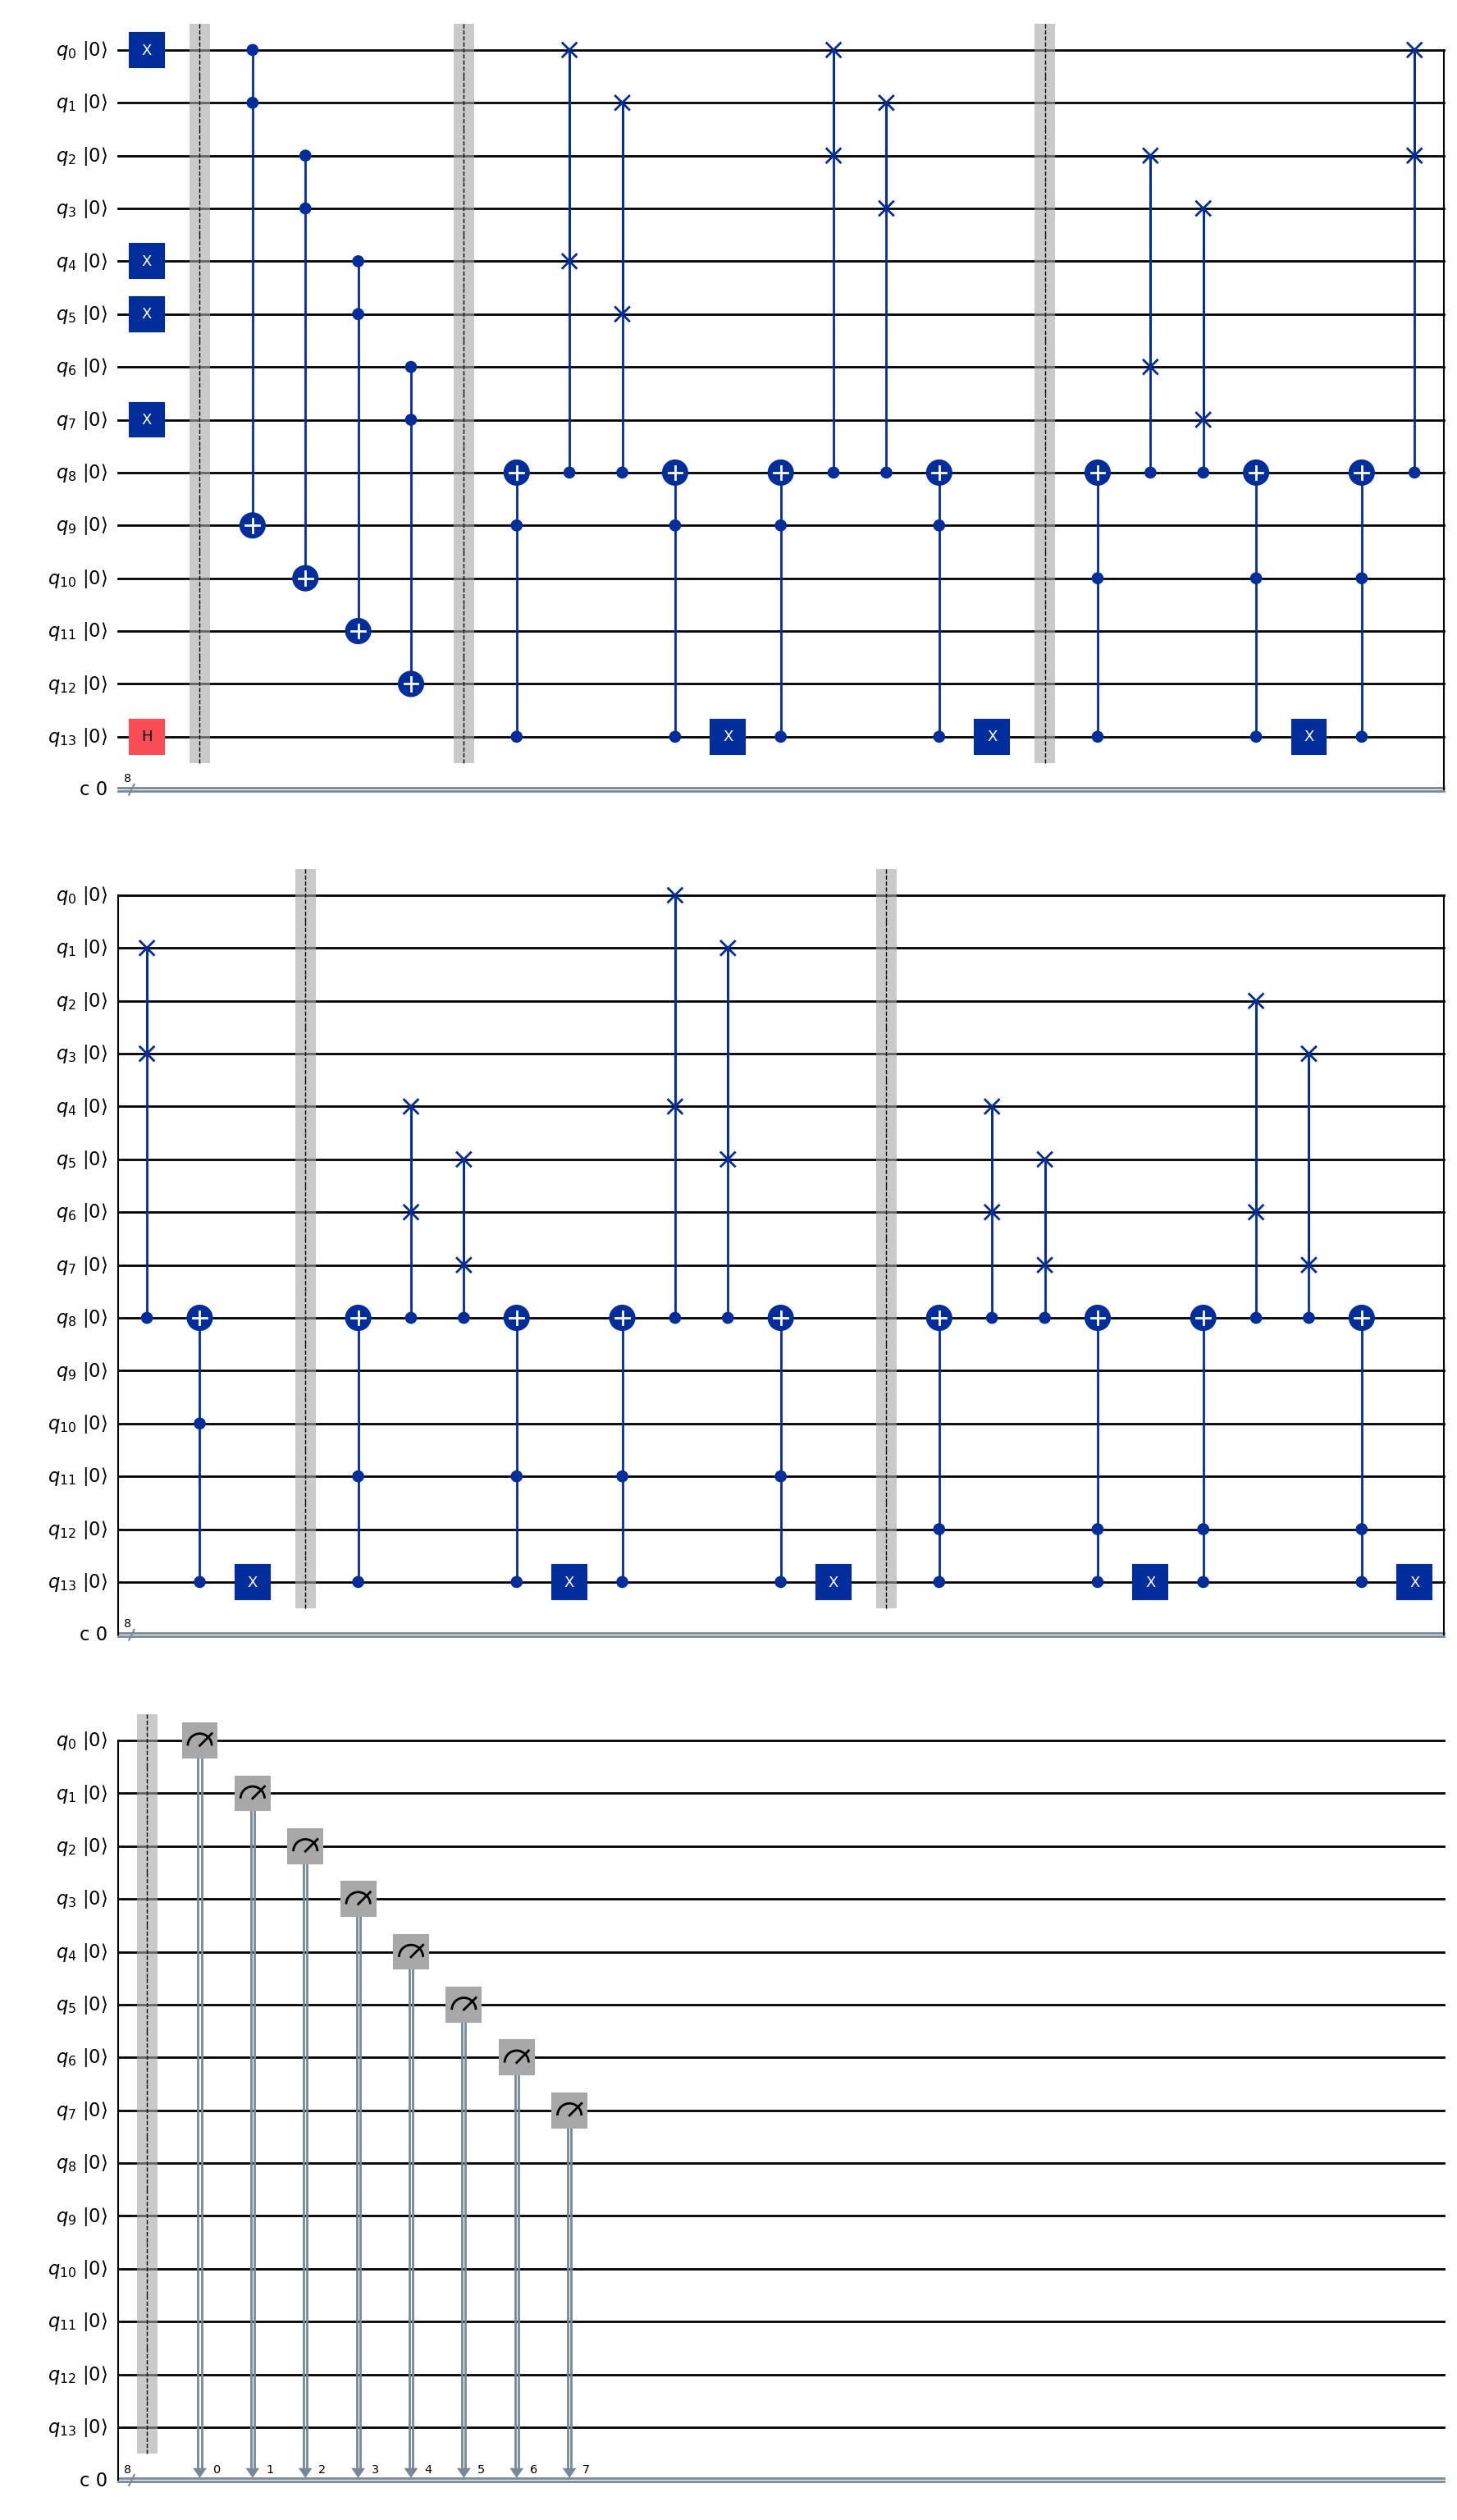

In [41]:
qc.draw(initial_state=True, output='mpl')

In [50]:
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()

qc_comilied = transpile(qc, backend)

job_sim = backend.run(qc_comilied, shots=1024)

result_sim = job_sim.result()

{'10010011': 525, '11100001': 499}


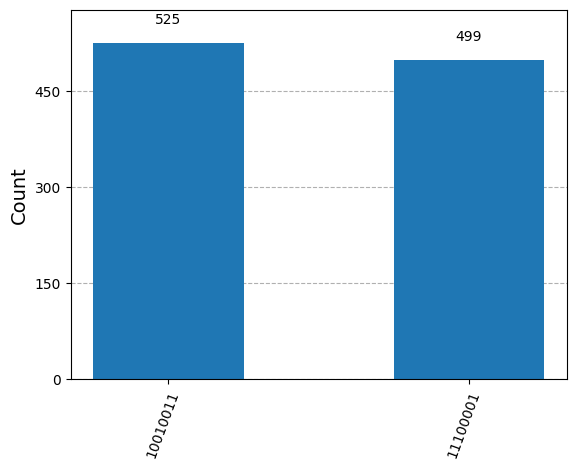

In [51]:
counts = result_sim.get_counts(qc_comilied)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)